# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

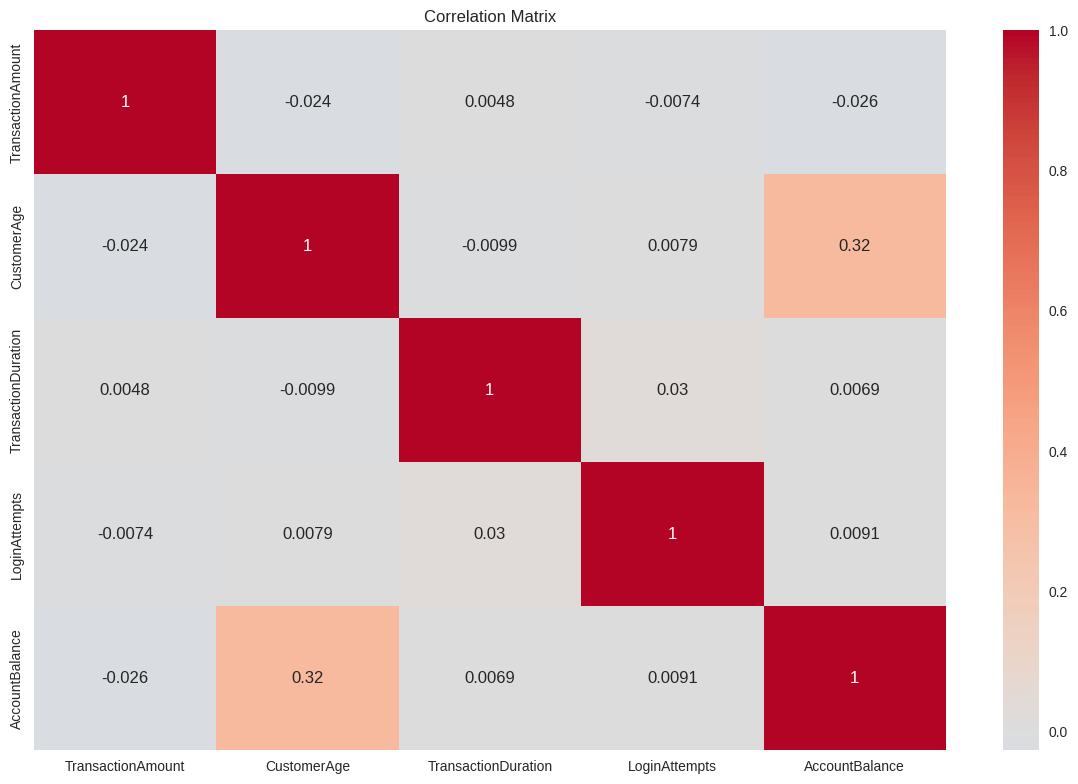

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

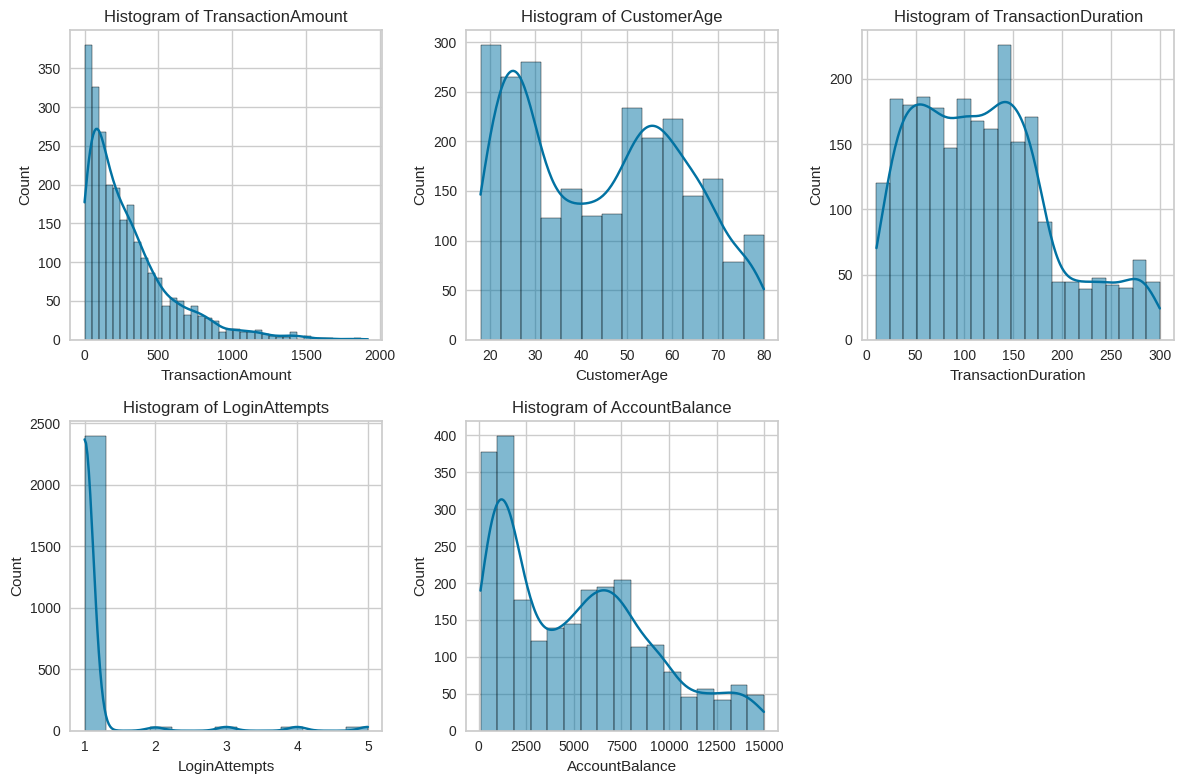

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [12]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionDate', 'PreviousTransactionDate']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
4,13.45,1939,0,1,2,NaN,3,198.0,1.0,7429.40,16


In [13]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,0.273642,0.5,0.837209,0.000000,0.838710,0.00,0.244828,0.0,0.336832,0.291667
1,0.195940,0.474044,0.5,0.348837,0.000000,0.806452,0.00,0.451724,0.0,0.918055,0.533333
2,0.065680,0.507847,0.5,0.534884,0.666667,0.016129,0.75,0.158621,0.0,0.068637,0.113889
3,0.096016,0.329175,0.5,0.767442,0.666667,0.129032,0.75,0.051724,0.0,0.569198,0.452778
4,0.006874,0.780282,0.0,0.023256,0.666667,NaN,0.75,0.648276,0.0,0.492591,0.044444


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
if df.isnull().sum().any():
     df = df.dropna()
     print("Missing values handled")
df.isnull().sum()


Missing values handled


,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
if df.duplicated().sum() > 0:
     df = df.drop_duplicates()
     print("Duplicate values removed")
df.duplicated().sum()

Duplicate values removed


np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def remove_outliers_iqr(df, columns):
     df_clean = df.copy()
     for col in columns:
         Q1 = df_clean[col].quantile(0.25)
         Q3 = df_clean[col].quantile(0.75)
         IQR = Q3 - Q1
         lower_bound = Q1 - 1.5 * IQR
         upper_bound = Q3 + 1.5 * IQR
         df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
     return df_clean

numerical_cols_for_outliers = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration']
df = remove_outliers_iqr(df, numerical_cols_for_outliers)
print(f"Shape after outlier removal: {df.shape}")

Shape after outlier removal: (2292, 11)


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
def create_bins_and_encode(df, column, bins, labels):
     df[f'{column}_binned'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
     le = LabelEncoder()
     df[f'{column}_binned'] = le.fit_transform(df[f'{column}_binned'])
     return df, le

# Binning for TransactionAmount
df, amount_bin_encoder = create_bins_and_encode(df, 'TransactionAmount',
                                                bins=[0, 0.25, 0.5, 0.75, 1.0],
                                                labels=['Low', 'Medium', 'High', 'Very High'])

# Binning for CustomerAge
df, age_bin_encoder = create_bins_and_encode(df, 'CustomerAge',
                                             bins=[0, 0.3, 0.6, 1.0],
                                             labels=['Young', 'Middle', 'Senior'])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,CustomerAge_binned
0,0.007207,0.273642,0.5,0.837209,0.000000,0.838710,0.00,0.244828,0.0,0.336832,0.291667,0,1
1,0.195940,0.474044,0.5,0.348837,0.000000,0.806452,0.00,0.451724,0.0,0.918055,0.533333,0,1
2,0.065680,0.507847,0.5,0.534884,0.666667,0.016129,0.75,0.158621,0.0,0.068637,0.113889,0,2
3,0.096016,0.329175,0.5,0.767442,0.666667,0.129032,0.75,0.051724,0.0,0.569198,0.452778,0,2
5,0.047888,0.255533,0.5,0.651163,0.000000,0.000000,0.75,0.558621,0.0,0.045738,0.036111,0,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,CustomerAge_binned
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,0.133072,0.502816,0.393979,0.497240,0.337405,0.430037,0.382308,0.377204,0.029996,0.337587,0.502517,0.158813,1.115183
std,0.112740,0.292109,0.219854,0.288561,0.276262,0.286996,0.288598,0.242559,0.146620,0.262305,0.287495,0.365582,0.814960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040821,0.250604,0.500000,0.255814,0.000000,0.145161,0.000000,0.182759,0.000000,0.094352,0.255556,0.000000,0.000000
50%,0.103729,0.499396,0.500000,0.488372,0.333333,0.435484,0.500000,0.351724,0.000000,0.311592,0.502778,0.000000,1.000000
75%,0.194834,0.756640,0.500000,0.744186,0.666667,0.661290,0.750000,0.524138,0.000000,0.509315,0.752778,0.000000,2.000000
max,0.470558,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


      CustomerAge  AccountBalance
0        0.838710        0.336832
1        0.806452        0.918055
2        0.016129        0.068637
3        0.129032        0.569198
4        0.000000        0.045738
...           ...             ...
2287     0.080645        0.112636
2288     0.096774        0.002017
2289     0.935484        0.323188
2290     0.306452        0.442881
2291     0.145161        0.073593

[2292 rows x 2 columns]


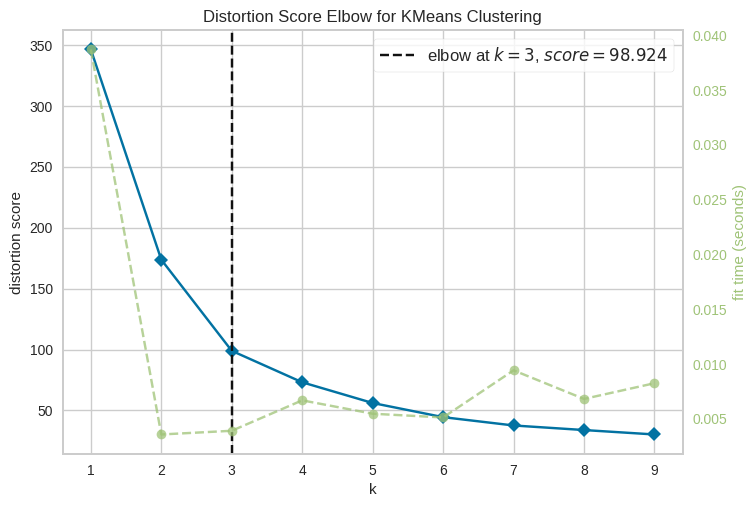

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Menggunakan 2 fitur utama untuk clustering (CustomerAge dan AccountBalance)
X = df[['CustomerAge', 'AccountBalance']].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['CustomerAge', 'AccountBalance']))

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [21]:
# inisialisasi dan melatih model KMeans dgn jumlah cluster
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(X)

# mendapatkan label cluster
labels = model_kmeans.labels_

# mendaptakn jumlah cluster
k = 3

# funsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis karakteristik setiap cluster: ")
    for cluster_id in range(k):
        # mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # menghitung rata-rata untuk setiap fitur dalam cluster
        mean_age = cluster_data[:, 0].mean()
        mean_accountBalance = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata CustomerAge: {mean_age:.2f}")
        print(f"Rata - rata AccountBalance: {mean_accountBalance:.2f}")

# analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis karakteristik setiap cluster: 

Cluster 1:
Rata-rata CustomerAge: 0.43
Rata - rata AccountBalance: 0.66

Cluster 2:
Rata-rata CustomerAge: 0.13
Rata - rata AccountBalance: 0.11

Cluster 3:
Rata-rata CustomerAge: 0.71
Rata - rata AccountBalance: 0.30


In [22]:
# Menambahkan hasil cluster ke dataframe
df['cluster'] = labels

In [23]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Hitung Silhouette Score
sil_score = silhouette_score(X, labels)

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4865


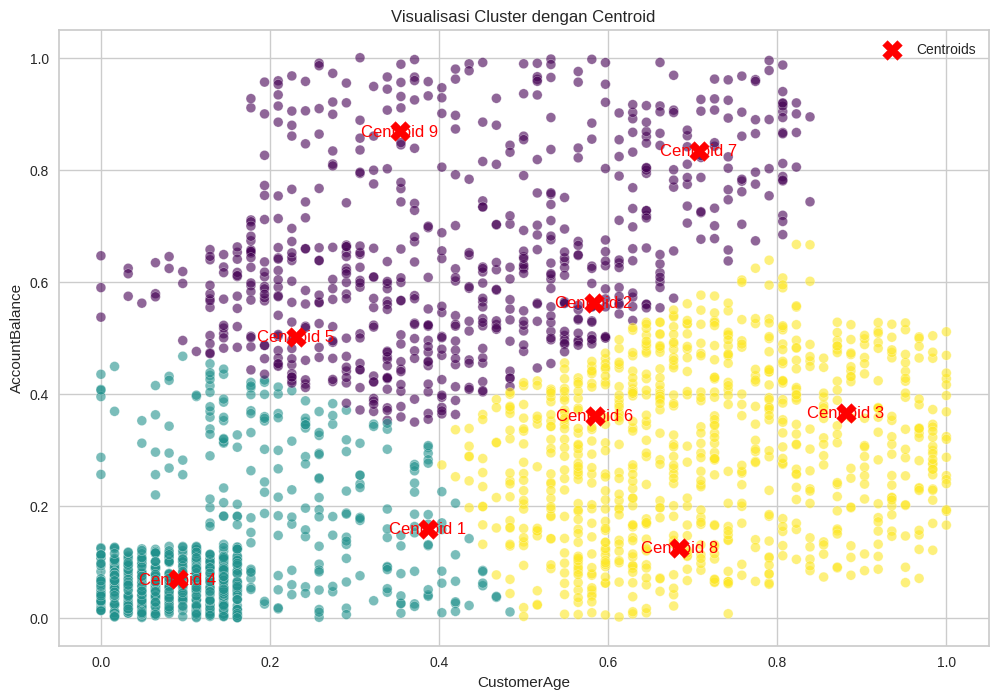

Nilai Centroids:
Centroid 1:CustomerAge = 0.39, AccountBalance = 0.16
Centroid 2:CustomerAge = 0.58, AccountBalance = 0.56
Centroid 3:CustomerAge = 0.88, AccountBalance = 0.36
Centroid 4:CustomerAge = 0.09, AccountBalance = 0.07
Centroid 5:CustomerAge = 0.23, AccountBalance = 0.50
Centroid 6:CustomerAge = 0.58, AccountBalance = 0.36
Centroid 7:CustomerAge = 0.71, AccountBalance = 0.83
Centroid 8:CustomerAge = 0.68, AccountBalance = 0.12
Centroid 9:CustomerAge = 0.35, AccountBalance = 0.87


In [25]:
# Membuat visualisasi hasil clustering
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}:CustomerAge = {centroid[0]:.2f}, AccountBalance = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [27]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


Cluster 1: (Nasabah Usia Menengah dengan Saldo Tinggi)

- Rata-rata (mean) CustomerAge: 0.43

- Rata-rata (mean) AccountBalance: 0.66

- Analisis: Cluster ini mencakup nasabah dengan usia rata-rata menengah dan saldo akun relatif tinggi. Nasabah dalam cluster ini cenderung sudah mapan secara finansial dengan kemampuan menyimpan saldo dalam jumlah cukup besar. Rekomendasi untuk kelompok ini adalah dengan menawarkan produk premium seperti investasi berisiko menengah–tinggi, layanan prioritas, atau program loyalitas yang berorientasi pada kenyamanan dan eksklusivitas.

Cluster 2: (Nasabah Muda dengan Saldo Rendah)

- Rata-rata (mean) CustomerAge: 0.13

- Rata-rata (mean) AccountBalance: 0.11

- Analisis: Cluster ini didominasi oleh nasabah berusia muda dengan saldo akun yang sangat rendah. Mereka kemungkinan baru memulai aktivitas keuangan atau berada pada tahap awal karier sehingga daya beli dan saldo masih terbatas. Rekomendasi pada kelompok ini adalah memberikan edukasi finansial, program tabungan pemula, serta promosi produk dengan biaya rendah atau cicilan ringan agar mereka semakin aktif menggunakan layanan.

Cluster 3: (Nasabah Usia Lebih Tua dengan Saldo Sedang)

- Rata-rata (mean) CustomerAge: 0.71

- Rata-rata (mean) AccountBalance: 0.30

- Analisis: Cluster ini terdiri dari nasabah dengan usia rata-rata lebih tua dan saldo akun berada pada kategori sedang. Meskipun sudah stabil secara usia, sebagian besar nasabah di kelompok ini tidak menyimpan saldo sebesar cluster 1. Mereka cenderung lebih berhati-hati dalam bertransaksi dan lebih memilih produk yang aman. Rekomendasi untuk kelompok ini adalah penawaran produk keuangan konservatif seperti deposito berjangka, asuransi, atau reksa dana dengan risiko rendah.

In [28]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Ubah label cluster agar dimulai dari 1


# Lakukan groupby untuk analisis
cluster_analysis = df.groupby('cluster')[['CustomerAge', 'AccountBalance']].agg(['mean', 'min', 'max']).round(3)

print("Cluster Analysis untuk CustomerAge dan AccountBalance:")
print(cluster_analysis)

Cluster Analysis untuk CustomerAge dan AccountBalance:
        CustomerAge               AccountBalance              
               mean    min    max           mean    min    max
cluster                                                       
0             0.427  0.000  0.839          0.655  0.349  1.000
1             0.132  0.000  0.484          0.109  0.000  0.467
2             0.714  0.403  1.000          0.297  0.001  0.667


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

1. Cluster 1: (Nasabah Dewasa dengan Saldo Tinggi):

- Rata-rata (mean) CustomerAge: 0.427 (Middle-aged customers)
- Rata-rata (mean) AccountBalance: 0.655 (High account balance)
- Analisis: Cluster ini mencakup nasabah dengan usia menengah dan saldo rekening yang tinggi. Nasabah dalam cluster ini memiliki stabilitas finansial yang baik dengan rata-rata saldo 65.5% dari range maksimum. Mereka menunjukkan pola keuangan yang stabil dan cocok untuk produk investasi atau layanan premium banking.

2. Cluster 3: (Nasabah Muda dengan Saldo Rendah):

- Rata-rata (mean) CustomerAge: 0.132 (Young customers)
- Rata-rata (mean) AccountBalance: 0.109 (Low account balance)
- Analisis: Cluster ini mencakup nasabah muda dengan saldo rekening yang rendah. Kelompok ini kemungkinan besar adalah nasabah baru, mahasiswa, atau pekerja entry-level yang baru memulai karir. Mereka cocok untuk produk tabungan dasar, kartu kredit dengan limit rendah, atau produk edukasi keuangan untuk membangun kebiasaan menabung yang baik.

3. Cluster 2: (Nasabah Senior dengan Saldo Menengah):

- Rata-rata (mean) CustomerAge: 0.714 (Senior customers)
- Rata-rata (mean) AccountBalance: 0.297 (Medium account balance)
- Analisis: Cluster ini terdiri dari nasabah berusia lanjut dengan saldo rekening menengah. Meskipun memiliki usia yang lebih tinggi (71.4% dari range), saldo mereka relatif lebih rendah dibanding cluster 0. Kelompok ini mungkin sudah memasuki fase pensiun atau mendekati pensiun, sehingga cocok untuk produk pensiun, asuransi kesehatan, atau produk keuangan konservatif.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = df['cluster']
df = df.drop('cluster', axis=1)

In [30]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

print("Data clustering berhasil disimpan sebagai 'data_clustering.csv'")
print(f"Shape of final dataset: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Data clustering berhasil disimpan sebagai 'data_clustering.csv'
Shape of final dataset: (2292, 14)
Columns: ['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'TransactionAmount_binned', 'CustomerAge_binned', 'Target']


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df_inverse = df.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,CustomerAge_binned,Target
0,14.09,680.0,1.0,36.0,0.0,70.0,0.0,81.0,1.0,5112.21,105.0,0,1,2
1,376.24,1178.0,1.0,15.0,0.0,68.0,0.0,141.0,1.0,13758.91,192.0,0,1,0
2,126.29,1262.0,1.0,23.0,2.0,19.0,3.0,56.0,1.0,1122.35,41.0,0,2,1
3,184.50,818.0,1.0,33.0,2.0,26.0,3.0,25.0,1.0,8569.06,163.0,0,2,0
5,92.15,635.0,1.0,28.0,0.0,18.0,3.0,172.0,1.0,781.68,13.0,0,2,1


In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,CustomerAge_binned,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,1,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0,1,0
2,126.29,2023-07-10 18:16:08,Debit,Memphis,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,2,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,2,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,0,2,1


In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
cluster_analysis_inverse = df_inverse.groupby('Target').agg({
    **{col: ['mean', 'min', 'max'] for col in numerical_cols},
    **{col: lambda x: x.mode()[0] if len(x.mode()) > 0 else 'N/A' for col in categorical_cols}
}).round(3)


cluster_analysis_inverse


TransactionAmount                    TransactionDate TransactionType  \
                    mean   min     max             <lambda>        <lambda>   
Target                                                                        
0                254.167  0.32  903.19  2023-02-06 17:32:11           Debit   
1                260.592  0.26  890.24  2023-01-02 17:00:33           Debit   
2                252.071  0.84  888.57  2023-01-16 16:31:48           Debit   

            Location  Channel CustomerAge              ...  \
            <lambda> <lambda>        mean   min   max  ...   
Target                                                 ...   
0            Memphis   Branch      44.447  18.0  70.0  ...   
1            Memphis   Branch      26.164  18.0  48.0  ...   
2       Philadelphia      ATM      62.247  43.0  80.0  ...   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0                  121.221  10.0  300.0         1.107  1.0  5.0   
1                  119.820  10.0  299.0         1.121  1.0  5.0   
2                  117.505  10.0  299.0         1.129  1.0  5.0   

       AccountBalance                    PreviousTransactionDate  
                 mean      min       max                <lambda>  
Target                                                            
0            9849.453  5298.85  14977.99     2024-11-04 08:09:17  
1            1718.635   101.25   7047.04     2024-11-04 08:08:10  
2            4514.546   120.89  10017.11     2024-11-04 08:07:59  

[3 rows x 21 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

1. Cluster 0

- Rata-rata (mean):
  - TransactionAmount: 254.167
  - CustomerAge: 44.447
  - AccountBalance: 9849.453
- Analisis:
Cluster ini berisi nasabah dengan usia rata-rata paruh baya (sekitar 44 tahun) dan saldo akun tinggi, yakni hampir 10.000 dengan rentang saldo minimal lebih dari 5.000. Nilai transaksi mereka rata-rata sekitar 254 dengan variasi yang cukup besar hingga lebih dari 900. Secara keseluruhan, cluster ini menggambarkan kelompok nasabah mapan secara finansial dengan aktivitas transaksi yang relatif aktif dan kapasitas saldo besar, sehingga berpotensi menjadi segmen prioritas dalam layanan premium.

2. Cluster 1
- Rata-rata (mean):
  - TransactionAmount: 260.592
  - CustomerAge: 26.164
  - AccountBalance: 1718.635

- Analisis:
Cluster ini mencerminkan nasabah dengan usia relatif muda (rata-rata 26 tahun) dan saldo akun rendah, rata-rata hanya sekitar 1.700. Transaksi mereka bernilai sedang (sekitar 260) tetapi dengan rentang saldo yang sangat luas, ada yang hanya sekitar seratus hingga lebih dari tujuh ribu. Cluster ini bisa dikategorikan sebagai nasabah pemula atau early career, yang mungkin baru mulai bertransaksi atau menabung dalam jumlah kecil. Potensinya adalah segmen yang bisa ditumbuhkan menjadi lebih bernilai melalui edukasi keuangan atau program loyalitas.

Cluster 2

- Rata-rata (mean):

  - TransactionAmount: 252.071
  - CustomerAge: 62.247
  - AccountBalance: 4514.546

- Analisis:
Cluster ini terdiri dari nasabah dengan usia lebih tua (rata-rata 62 tahun) dan saldo akun menengah, sekitar 4.500. Nilai transaksi mereka rata-rata tidak jauh berbeda dengan cluster lain (~250), tetapi variasi saldo cukup besar, dari sangat kecil hingga di atas 10.000. Cluster ini dapat digolongkan sebagai nasabah senior yang cukup stabil secara usia, namun aktivitas finansialnya bervariasi: ada yang menyimpan saldo kecil hingga cukup besar. Mereka cenderung lebih konservatif dan membutuhkan pendekatan layanan yang disesuaikan, seperti produk tabungan jangka panjang atau layanan personal.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [36]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [37]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)


End of Code.